# Assignment – Preprocessing Data for scikit-learn
 Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis. In this assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4.
 
## Mushrooms Dataset.
A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking. For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

### Your assignment is to:
- First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!
- Create a `pandas DataFrame` with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
- Add meaningful names for each column.
- Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using `scikit-learn` requires that values be stored as numerics.
- Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
- Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.


Your deliverable is a Jupyter Notebook that performs these transformation and exploratory data analysis tasks.


*** 
### First we must import the libraries we will need

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

***
## First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!

I was able to find the "data dictonary" under the `agaricus-lepiota.names` file

In [2]:
data_dictonary = open('agaricus-lepiota.names', 'r')
print (data_dictonary.read())

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

***
## Create a `pandas DataFrame` with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.

Now we will create our dataframe  with our prefered rows.

In [3]:
import_file = 'agaricus-lepiota.data'
mushroom_dataset = pd.read_csv(import_file, header=None, usecols=[0, 3, 5])
mushroom_dataset.head(11)

,0,3,5
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n
5,e,y,a
6,e,w,a
7,e,w,l
8,p,w,p
9,e,y,a


***
## Add meaningful names for each column.

In [4]:
column_names = ['Edible/Poisonous', 'Cap-Color', 'Odor']
mushroom_dataset.columns = column_names
mushroom_dataset.head(11)

,Edible/Poisonous,Cap-Color,Odor
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n
5,e,y,a
6,e,w,a
7,e,w,l
8,p,w,p
9,e,y,a


***
## Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using `scikit-learn` requires that values be stored as numerics.

In [5]:
replace_with_num_values = mushroom_dataset.replace({'Edible/Poisonous':{'e':0,
                                                                        'p':1},
                                                    'Cap-Color':{'n':0,
                                                                 'b':1,
                                                                 'c':2,
                                                                 'g':3,
                                                                 'r':4,
                                                                 'p':5,
                                                                 'u':6,
                                                                 'e':7,
                                                                 'w':8,
                                                                 'y':9},
                                                    'Odor':{'a': 0,
                                                            'l': 1,
                                                            'c': 2,
                                                            'y': 3,
                                                            'f': 4,
                                                            'm': 5,
                                                            'n': 6,
                                                            'p': 7,
                                                            's': 8}})
replace_with_num_values.head(11)

,Edible/Poisonous,Cap-Color,Odor
0,1,0,7
1,0,9,0
2,0,8,1
3,1,8,7
4,0,3,6
5,0,9,0
6,0,8,0
7,0,8,1
8,1,8,7
9,0,9,0


***
## Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.

Below we will create 3 bar garphs for each column, displaying the counts of each value.

In [6]:
edible_or_poisonous_graph = replace_with_num_values['Edible/Poisonous'].value_counts()
edible_or_poisonous_graph


0    4208
1    3916
Name: Edible/Poisonous, dtype: int64

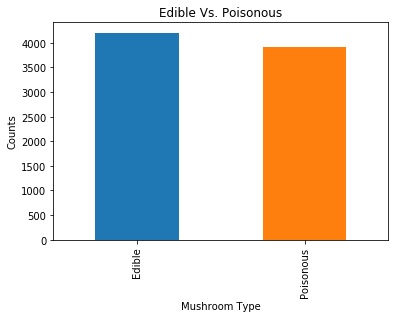

In [7]:
edible_or_poisonous_graph.plot(kind='bar')
names = ['Edible', 'Poisonous']
values = [0,1]

plt.title('Edible Vs. Poisonous')
plt.xlabel('Mushroom Type')
plt.ylabel('Counts')
plt.xticks([i for i, _ in enumerate(names)], names)
plt.show()

In [8]:
cap_color_graph = replace_with_num_values['Cap-Color'].value_counts()
cap_color_graph

0    2284
3    1840
7    1500
9    1072
8    1040
1     168
5     144
2      44
6      16
4      16
Name: Cap-Color, dtype: int64

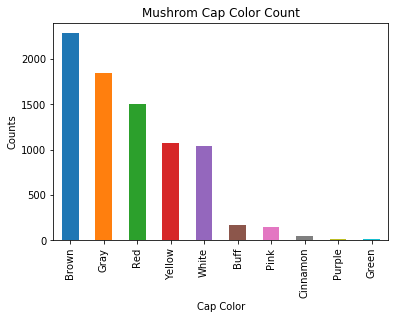

In [9]:
#3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
#'Cap-Color':{'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9}
cap_color_graph.plot(kind='bar')
cap_colors = ['Brown', 'Gray', 'Red','Yellow','White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green']
values = [0,1,2,3,4,5,6,7,8,9]

plt.title('Mushrom Cap Color Count')
plt.xlabel('Cap Color')
plt.ylabel('Counts')
plt.xticks([i for i, _ in enumerate(cap_colors)], cap_colors)
plt.show()

In [10]:
odor_graph = replace_with_num_values['Odor'].value_counts()
odor_graph

6    3528
4    2160
3     576
8     576
1     400
0     400
7     256
2     192
5      36
Name: Odor, dtype: int64

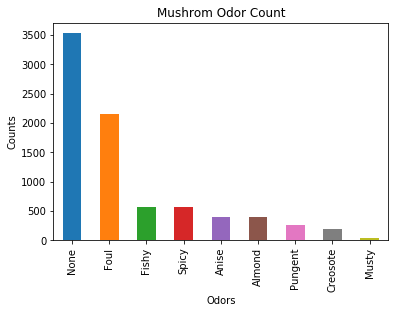

In [11]:
#5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
#'Odor':{'a': 0,'l': 1,'c': 2,'y': 3,'f': 4,'m': 5,'n': 6,'p': 7,'s': 8}
odor_graph.plot(kind='bar')
odors = ['None', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent', 'Creosote', 'Musty']
values = [0,1,2,3,4,5,6,7,8]

plt.title('Mushrom Odor Count')
plt.xlabel('Odors')
plt.ylabel('Counts')
plt.xticks([i for i, _ in enumerate(odors)], odors)
plt.show()

### Below we show a scatterplot for Edible/Poisonous vs. Odor vs. Cap-Color.

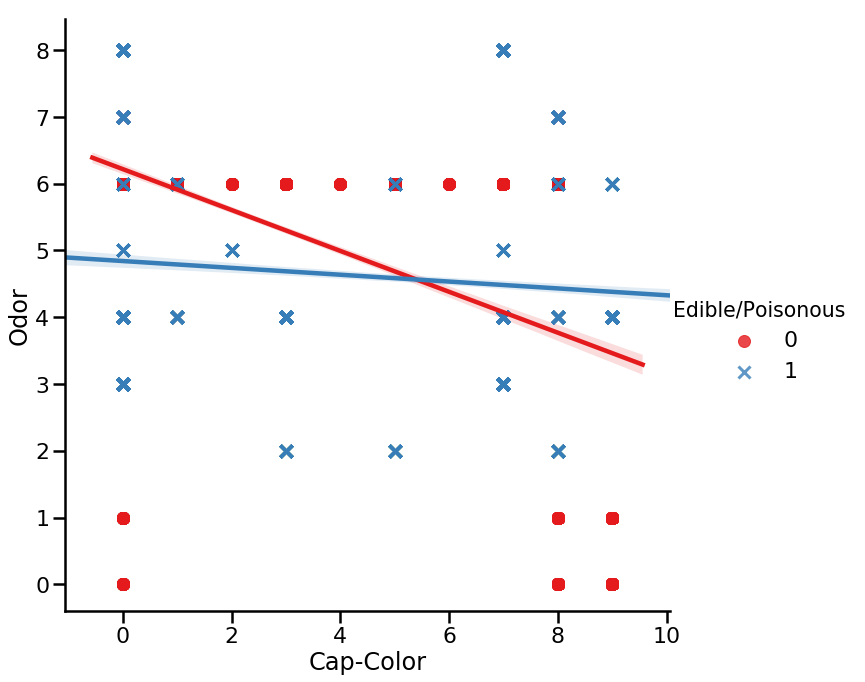

In [13]:
sns.set_context("poster")
Analysis = sns.lmplot(hue='Edible/Poisonous', x='Cap-Color', y='Odor', data=replace_with_num_values, markers=["o", "x"], palette="Set1", height=10)
Analysis.set_axis_labels('Cap-Color', 'Odor')
plt.show()

***
## Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

It dose not look as if cap color would help in being able to tell if a mushroom is posinous or not. However, Oder is very helpful in distinguising if a mushroom is posinous or not. Unless it is an oderless muchroom as seen on Oder axis line 6 (6= None). As this line contains both posinous and non posinous mushrooms and in some cases the same cap color contain both posinous and non posinous mushrooms of the same color (Oderless mushrooms containing both posinous and edible mushrooms are cap-colors 0=Brown, 1=Buff, 5=Pink, 8=White).